In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

sns.set()

In [ ]:
np.random.seed(87)

N1 = N2 = 1000
K1 = 500
K2 = 580

y1 = np.zeros(N1)
y1[np.random.choice(np.arange(len(y1)),replace=False,size=K1)] = 1

y2 = np.zeros(N2)
y2[np.random.choice(np.arange(len(y2)),replace=False,size=K2)] = 1

observations_A = sum(y1)
observations_B = sum(y2)

observations_B

In [ ]:
prior_A = pm.Beta.dist(alpha=K1,beta=N1-K1).random(size=1000)
plt.hist(prior_A)

In [ ]:
with pm.Model() as model:

    # define priors
    p_A = pm.Beta('p_A', alpha=K1,beta=N1-K1)
    p_B = pm.Beta('p_B', alpha=K1,beta=N1-K1)
    
    # define likelihood
    obs_A = pm.Binomial('obs_A', n=len(y1), p=p_A, observed=observations_A)
    obs_B = pm.Binomial('obs_B', n=len(y2), p=p_B, observed=observations_B)
    
    # define metrics
    pm.Deterministic('difference', p_B - p_A)
    pm.Deterministic('relation', (p_B/p_A) - 1)
    
    trace = pm.sample(progressbar=True)
    
    trace_df = pm.trace_to_dataframe(trace)
    
    


In [ ]:
with model:
    az.plot_trace(trace)

In [ ]:
with model:
    az.plot_posterior(trace,figsize=(18,6),hdi_prob=0.89,ref_val=0,var_names=['p_A'])
    az.plot_posterior(trace,figsize=(18,6),hdi_prob=0.89,ref_val=0,var_names=['p_B'])
    az.plot_posterior(trace,figsize=(18,6),hdi_prob=0.89,ref_val=0,var_names=['difference'])
    az.plot_posterior(trace,figsize=(18,6),hdi_prob=0.89,ref_val=0,var_names=['relation'])

In [ ]:
with model:
    print (az.summary(trace,hdi_prob=0.89))

In [ ]:
### diff and rel. of frequencies ###

df = pd.DataFrame({'group_A' : [1,2,3,3,3,3,3,3,4,4,5],
                  'group_B' : [1,2,2,3,3,3,4,4,5,5,5]})

df

In [ ]:
A_freq = df['group_A'].value_counts()
B_freq = df['group_B'].value_counts()

freq_table = pd.DataFrame({'A' : A_freq,
                          'B' : B_freq})

freq_table['diff'] = freq_table['A'] - freq_table['B']
freq_table['rel'] = freq_table['A'] / freq_table['B']

freq_table

In [ ]:
freq_table.plot(kind='bar',y=['A','B'])


<AxesSubplot:>

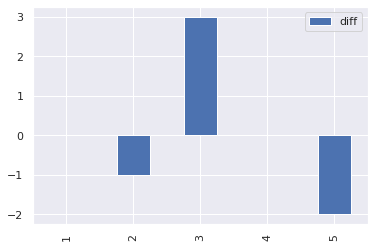

In [170]:
freq_table.plot(kind='bar',y=['diff'])

In [ ]:
trace_df

In [ ]:
trace_df['p_B'] - trace_df['p_A']